In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import theano.tensor as tt
import math

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/manisha/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [39]:
hosp = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
deaths = [0, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24]
total = [47, 148, 119, 810, 211, 196, 148, 215, 207, 97, 256, 360]
cols = ["R", "N"]
surgical_data = pd.DataFrame(columns = cols)
surgical_data["R"] = deaths
surgical_data["N"] = total

In [32]:
surgical_data

,R,N
0,0,47
1,18,148
2,8,119
3,46,810
4,8,211
5,13,196
6,9,148
7,31,215
8,14,207
9,8,97


In [54]:
N = len(surgical_data)
index = [0,1,2,3,4,5,6,7,8,9,10,11]
print(index[0])


0


In [71]:
with pm.Model() as surgical_model:
    mu_b = pm.Normal('mu', mu=0, sd = 1e-6)
    tau_b = pm.Gamma('tau', 0.001, 0.001)
    #sd_b = pm.Deterministic('sd_b', 1/pm.math.sqrt(tau_b))
    b = pm.Normal('b', mu=mu_b, tau= tau_b, shape=N)
    prob = pm.Deterministic('prob', pm.math.invlogit(b[index]))
    r = pm.Binomial('r', p = prob[index], n = total, observed = deaths)
    

In [73]:
with surgical_model:
    surgical_trace = pm.sample(500, tune=1000, progressbar = True, init = 'advi')

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO (theano.gof.compilelock): Refreshing lock /home/manisha/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-3.6.3-64/lock_dir/lock
Average Loss = 21,719:  24%|██▍       | 48078/200000 [00:43<02:17, 1102.18it/s]    
Convergence archived at 48100
Interrupted at 48,099 [24%]: Average Loss = 1.4887e+10
INFO (theano.gof.compilelock): Refreshing lock /home/manisha/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-3.6.3-64/lock_dir/lock
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, tau_log__, mu]
100%|██████████| 1500/1500 [01:14<00:00, 20.12it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73a0021c88>,
      dtype=object)

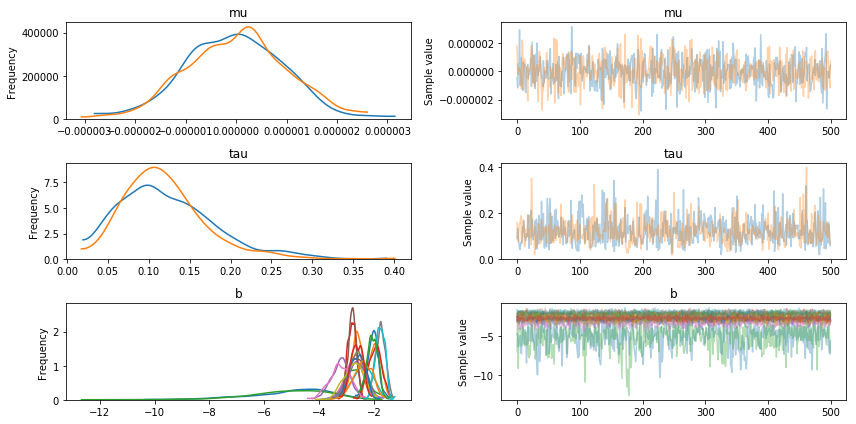

In [79]:
pm.traceplot(surgical_trace, varnames=['mu', 'tau', 'b'])

In [74]:
pm.summary(surgical_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-1.676963e-08,9.825514e-07,2.924150e-08,-0.000002,0.000002,1091.026663,0.999483
b__0,-5.132636e+00,1.501873e+00,6.018766e-02,-7.866817,-2.450923,536.644614,0.999393
b__1,-1.983287e+00,2.398244e-01,6.112680e-03,-2.437431,-1.530076,1577.550348,0.999149
b__2,-2.649327e+00,3.705274e-01,1.040582e-02,-3.306097,-1.874765,1463.012258,0.999002
b__3,-2.809377e+00,1.558142e-01,3.390179e-03,-3.098053,-2.497046,1826.954269,0.999161
b__4,-3.244634e+00,3.596430e-01,1.055035e-02,-3.938178,-2.561222,1209.273684,1.000575
b__5,-2.651716e+00,2.895307e-01,8.274688e-03,-3.247625,-2.129561,1318.798835,0.999207
b__6,-2.748716e+00,3.398072e-01,8.642745e-03,-3.463202,-2.152393,1581.094500,1.000118
b__7,-1.780673e+00,1.744927e-01,4.660838e-03,-2.126606,-1.470342,1603.490388,0.999791
b__8,-2.627875e+00,2.768376e-01,7.104658e-03,-3.181691,-2.112349,1596.506110,0.999496
